<a href="https://colab.research.google.com/github/Sahar-Omari/Sahar-Omari/blob/main/EDA__RegressionModels_Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='whitegrid')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from google.colab import files 
upload=files.upload()
df=pd.read_csv('train.csv')

Saving train.csv to train (2).csv


In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [ ]:
df.describe() 

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.isna().sum()


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
sum(df["price"] >= 15000)

1418

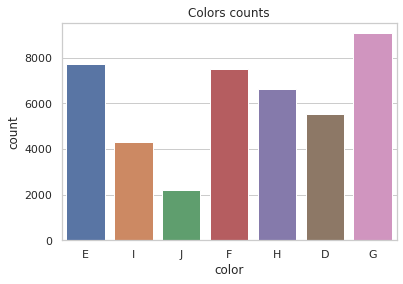

In [ ]:
Cplot=sns.countplot(x='color',data= df).set(title='Colors counts')

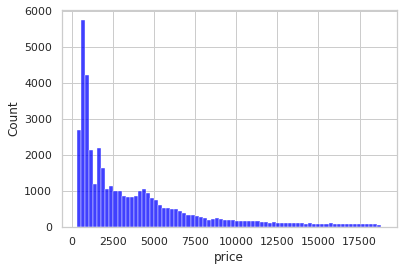

In [ ]:
sns.histplot(df['price'],color="blue")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


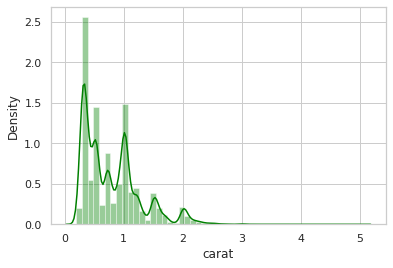

In [ ]:
sns.distplot(df["carat"],color ="green")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Price')

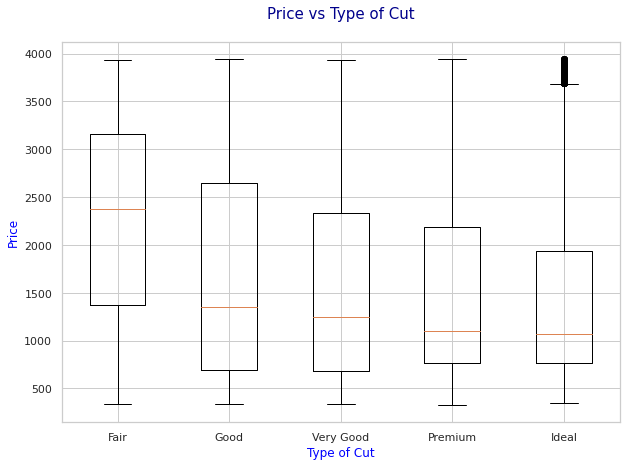

In [ ]:
data_fair = df[(df['cut'] == 'Fair') & (df['price'] <df['price'].mean()) ]
data_good = df[(df['cut'] == 'Good') & (df['price'] < df['price'].mean())]
data_vgood = df[(df['cut'] == 'Very Good') & (df['price'] < df['price'].mean())]
data_premium = df[(df['cut'] == 'Premium') & (df['price'] < df['price'].mean())]
data_ideal = df[(df['cut'] == 'Ideal') & (df['price'] < df['price'].mean())]

plt.figure(figsize = [10,7])

box=plt.boxplot([data_fair['price'], data_good['price'], data_vgood['price'], data_premium['price'], data_ideal['price']])


plt.xticks((1,2,3,4,5), ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

plt.title("Price vs Type of Cut\n", fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'darkblue'})

plt.xlabel("Type of Cut", fontdict={'fontsize': 12, 'fontweight' : 15, 'color' : 'blue'})
plt.ylabel("Price", fontdict={'fontsize': 12, 'fontweight' : 15, 'color' : 'blue'})


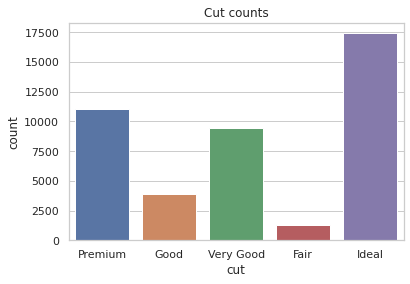

In [ ]:
Cplot=sns.countplot(x='cut',data= df).set(title='Cut counts')

In [ ]:
Data=df.groupby(["cut","color"])["price"].mean()

Data

cut        color
Fair       D        4425.900000
           E        3780.304813
           F        3937.386831
           G        4451.229167
           H        5445.148472
           I        4961.794326
           J        5232.295918
Good       D        3400.102996
           E        3668.244170
           F        3634.106838
           G        4081.160935
           H        4372.406690
           I        5213.430657
           J        4722.652720
Ideal      D        2502.360677
           E        2588.935759
           F        3355.582600
           G        3599.244130
           H        3851.284517
           I        4495.166968
           J        4982.825284
Premium    D        3627.138322
           E        3555.797722
           F        4345.391631
           G        4469.019338
           H        5254.524573
           I        6111.349699
           J        6393.429688
Very Good  D        3552.029925
           E        3312.344981
           F        388

Text(0.5, 1.0, 'Distribution of price based on carat\n')

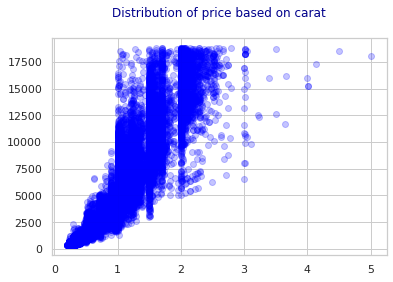

In [ ]:
plt.scatter(df["carat"],df["price"],color="blue", alpha = 0.23)
plt.title("Distribution of price based on carat\n", fontdict={'fontsize': 12, 'fontweight' : 12, 'color' : 'darkblue'})


In [ ]:
data = df.groupby("cut").count()
Label_data = []
for i in [0, 1, 4, 3, 2]: 
    Label_data.append(data.index[i])


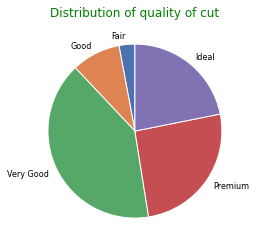

In [ ]:
plt.pie(data["price"],  labels=Label_data,  
        textprops={'fontsize': 8, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

plt.title("Distribution of quality of cut", fontdict={'fontsize': 12, 'fontweight' : 12, 'color' : 'green'})

plt.show()

In [ ]:
#Feature Engineering
# df = df.replace(df[df["x"]==0].index)
# df = df.drop(df[df["y"]==0].index)
# df = df.drop(df[df["z"]==0].index)
df
# df=pd.DataFrame(df)
# df['x']= df['x'].replace(0,df['x'].median())
# df['y'] = df['y'].replace(0,df['y'].median())
# df['z'] = df['z'].replace(0,df['z'].median())

# # df = df['x'].replace(0,df['x'].mode())
# # df = df['y'].replace(0,df['y']mode())
# # df = df['z'].replace(0,df['z'].mode())

# df['volume'] = df.x * df.y * df.z
print('Adding Volume column', df.head())
df = df.drop(['x','y','z'], axis=1)
print('\n After dropping x,y and z \n',df.head())
# upload=files.upload()
# dfTest=pd.read_csv('test.csv')
df.describe()

Adding Volume column    Unnamed: 0  carat  cut  color  clarity  depth  table  price     volume
0           2   0.21    4      2        2   59.8   61.0    326  34.505856
1           4   0.29    4      6        4   62.4   58.0    334  46.724580
2           5   0.31    2      7        1   63.3   58.0    335  51.917250
3           6   0.24    3      7        5   62.8   57.0    336  38.693952
4           7   0.24    3      6        6   62.3   57.0    336  38.830870


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,volume
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,3.916194,3.587593,3.254020,61.746080,57.439542,3942.706343,129.783743
std,15484.904515,0.481455,1.115766,1.703421,1.767471,1.435246,2.240196,4023.534556,79.806946
min,2.000000,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,31.707984
25%,13326.750000,0.380000,3.000000,2.000000,2.000000,61.000000,56.000000,940.000000,62.824595
50%,26824.500000,0.710000,4.000000,4.000000,3.000000,61.800000,57.000000,2388.000000,116.074827
75%,40290.250000,1.030000,5.000000,5.000000,4.000000,62.500000,59.000000,5309.250000,167.955889
max,53940.000000,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,3840.598060


In [ ]:
# dfTest = dfTest.drop(dfTest[dfTest["x"]==0].index)
# dfTest = dfTest.drop(dfTest[dfTest["y"]==0].index)
# dfTest = dfTest.drop(dfTest[dfTest["z"]==0].index)
dfTest['volume'] = dfTest.x * dfTest.y * dfTest.z
dfTest = dfTest.drop(['x','y','z'], axis=1)
dfTest

,Unnamed: 0,carat,cut,color,clarity,depth,table,volume
0,1,0.23,Ideal,E,SI2,61.5,55.0,38.202030
1,3,0.23,Good,E,VS1,56.9,65.0,38.076885
2,8,0.26,Very Good,H,SI1,61.9,55.0,42.321081
3,10,0.23,Very Good,H,VS1,59.4,61.0,38.718000
4,12,0.23,Ideal,J,VS1,62.8,56.0,37.704420
...,...,...,...,...,...,...,...,...
10895,53922,0.70,Very Good,E,VS2,62.8,60.0,111.489755
10896,53923,0.70,Very Good,D,VS1,63.1,59.0,112.317030
10897,53933,0.70,Very Good,E,VS2,60.5,59.0,114.126912
10898,53934,0.70,Very Good,E,VS2,61.2,59.0,113.588332


In [ ]:
#Replace Categoral values with numerical values for train and test data
df.cut.replace({'Ideal':5, 'Premium':4, 'Good':2, 'Very Good':3, 'Fair':1}, inplace=True)
df.color.replace({'E':2, 'I':6, 'J':7, 'H':5, 'F':3, 'G':4, 'D':1}, inplace=True)
df.clarity.replace({'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8}, inplace=True)
dfTest.cut.replace({'Ideal':5, 'Premium':4, 'Good':2, 'Very Good':3, 'Fair':1}, inplace=True)
dfTest.color.replace({'E':2, 'I':6, 'J':7, 'H':5, 'F':3, 'G':4, 'D':1}, inplace=True)
dfTest.clarity.replace({'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8}, inplace=True)

dfTest

,Unnamed: 0,carat,cut,color,clarity,depth,table,volume
0,1,0.23,5,2,1,61.5,55.0,38.202030
1,3,0.23,2,2,3,56.9,65.0,38.076885
2,8,0.26,3,5,2,61.9,55.0,42.321081
3,10,0.23,3,5,3,59.4,61.0,38.718000
4,12,0.23,5,7,3,62.8,56.0,37.704420
...,...,...,...,...,...,...,...,...
10895,53922,0.70,3,2,4,62.8,60.0,111.489755
10896,53923,0.70,3,1,3,63.1,59.0,112.317030
10897,53933,0.70,3,2,4,60.5,59.0,114.126912
10898,53934,0.70,3,2,4,61.2,59.0,113.588332


R squared of the Linear Regression on training set: 88.61%
R squared of the Linear Regression on test set: 87.79%


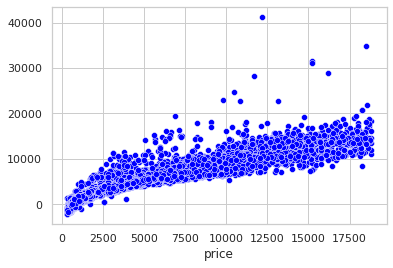

In [ ]:
from sklearn.model_selection import train_test_split
dfy=df['price']
dfx = df.drop(['price'], axis=1)
X_train,X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.31, random_state=80)
import sklearn.linear_model as sl
linreg = sl.LinearRegression()
linreg.fit(X_train, y_train)
print('R squared of the Linear Regression on training set: {:.2%}'.format(linreg.score(X_train, y_train)))
print('R squared of the Linear Regression on test set: {:.2%}'.format(linreg.score(X_test, y_test)))
y_pred = linreg.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred, color="blue")


In [ ]:
import sklearn.tree as st
tree = st.DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
print('R squared of the Decision Tree Regressor on training set: {:.2%}'.format(tree.score(X_train, y_train)))
print('R squared of the Decision Tree Regressor on test set: {:.2%}'.format(tree.score(X_test, y_test)))

R squared of the Decision Tree Regressor on training set: 100.00%
R squared of the Decision Tree Regressor on test set: 99.99%


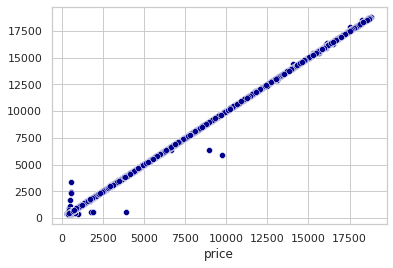

In [ ]:
y_pred1 = tree.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred1, color="darkblue")

In [ ]:
import sklearn.ensemble as se
rf = se.RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
print('R squared of the Random Forest Regressor on training set: {:.2%}'.format(rf.score(X_train, y_train)))
print('R squared of the Random Forest Regressor on test set: {:.2%}'.format(rf.score(X_test, y_test)))


R squared of the Random Forest Regressor on training set: 100.00%
R squared of the Random Forest Regressor on test set: 99.99%


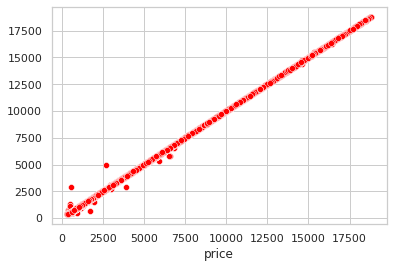

In [ ]:
y_pred2 = rf.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred2, color="red")

In [ ]:
# from google.colab import files 
# upload=files.upload()
# dfTest=pd.read_csv('test.csv')


In [ ]:
# predicted = linreg.predict(dfTestX)
# predicted=pd.DataFrame(predicted,dfTestX['Unnamed: 0'])
# predicted


In [ ]:
#sns.scatterplot(x=df['price'] , y=predicted, color="blue")

In [ ]:
# df1=df
# linreg.fit(df1, df['price'])
# import sklearn.tree as st
# tree = st.DecisionTreeRegressor(random_state=42)
# tree.fit(df1, df['price'])

In [ ]:
# print('R squared of the Decision Tree Regressor : {:.2%}'.format(tree.score(df1, df['price'])))
# PredictDecisionT = tree.predict(df1)
# Tree=pd.DataFrame(PredictDecisionT)
# Tree

In [ ]:
PredictRandomF = rf.predict(dfTest)
Random=pd.DataFrame(PredictRandomF)
Random

,0
0,359.070
1,345.845
2,347.760
3,351.835
4,353.785
...,...
10895,2753.945
10896,2756.215
10897,2756.495
10898,2756.520


In [ ]:
RFR=pd.DataFrame(PredictRandomF,dfTest['Unnamed: 0'])

RFR.to_csv('output1.csv',encoding='utf-8')
files.download('output1.csv')
   



# st.download_button(
#    "Press to Download",
#    csv,
#    "file.csv",
#    "text/csv",
#    key='download-csv'
# )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>